# Classification of the Iris Dataset

[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/qci-wdyk/eqc-models-tutorial/blob/main/tutorial06-classification-iris.ipynb)

A `QBoostClassifier` object builds $n$ weak classifiers from one of Decision Tree, Gaussian Naive Bayes, Logistic Regression, or Gaussian Process classifiers. Logistic Regression is the default. The number of classifiers, $n$ is determined as 1,2 or 3-combinations of all features. These classifiers are used to build a Hamiltonian whose minima represents an optimal linear combination of the weak classifiers correctly classifying the most records of the training dataset.

In [ ]:
import sys

# Check if we are in Google Colab
if 'google.colab' in sys.modules:
  print("Running in Google Colab. Performing setup...")
  # Installation process for EQC-models to be operable in Google Colab
  get_ipython().run_line_magic('shell', 'sudo apt-get update -y')
  get_ipython().run_line_magic('shell', 'sudo apt-get install software-properties-common')
  get_ipython().run_line_magic('shell', 'sudo add-apt-repository ppa:deadsnakes/ppa -y')
  get_ipython().run_line_magic('shell', 'sudo apt-get update -y')
  get_ipython().run_line_magic('shell', 'sudo apt-get install python3.10 python3.10-distutils -y')
  get_ipython().run_line_magic('shell', 'sudo update-alternatives --install /usr/bin/python3 python3 /usr/bin/python3.10 1')
  get_ipython().run_line_magic('shell', 'wget https://bootstrap.pypa.io/get-pip.py')
  get_ipython().run_line_magic('shell', 'python3.10 get-pip.py')
  get_ipython().run_line_magic('shell', 'python3.10 -m pip install eqc_models numpy matplotlib')
  print("Colab setup complete.")

else:
  print("Running in a local environment. Assuming packages are installed.")

# Now, your regular code can follow.
# In Colab, you still need to use the !python3.10 trick to run your scripts.
# In your local notebook, you can just run code in the cells as usual.

In [1]:
import sys
import os
from collections import Counter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    confusion_matrix,
    precision_score,
    recall_score,
    accuracy_score,
    roc_curve,
    auc
)
import warnings
warnings.filterwarnings("ignore")

from eqc_models.ml.classifierqboost import QBoostClassifier

In [2]:
# Set parameters
TEST_SIZE = 0.2

# Read dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [3]:
# Pre-Process
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

for i in range(len(y)):
    if y[i] == 0:
        y[i] = -1
    elif y[i] == 2:
        y[i] = 1

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=TEST_SIZE,
    random_state=42,
)
print("\nTraining Data")
print("="*40)
print(Counter(y_train))
print(X_train.shape)
print(y_train.shape)
print("\nTest Data")
print("="*40)
print(Counter(y_test))
print(X_test.shape)
print(y_test.shape)



Training Data
Counter({1: 80, -1: 40})
(120, 4)
(120,)

Test Data
Counter({1: 20, -1: 10})
(30, 4)
(30,)


In [4]:
# Get QBoost model
obj = QBoostClassifier(
    relaxation_schedule=1,
    num_samples=1,
    lambda_coef=0.0,
    weak_cls_strategy='sequential'
)

# Train
obj.fit(X_train, y_train)

y_train_prd = obj.predict(X_train)
y_test_prd = obj.predict(X_test)


Runtime of _build_weak_classifiers_sq: 0.04 seconds!
Built 10 weak classifiers!
Runtime of get_hamiltonian: 0.04 seconds!
2025-03-15 10:15:39 - Dirac allocation balance = 0 s (unmetered)
2025-03-15 10:15:39 - Job submitted: job_id='67d5a7ab00e804f113aefcc0'
2025-03-15 10:15:39 - QUEUED
2025-03-15 10:16:07 - RUNNING
2025-03-15 10:16:13 - COMPLETED
2025-03-15 10:16:15 - Dirac allocation balance = 0 s (unmetered)
{'job_info': {'job_id': '67d5a7ab00e804f113aefcc0', 'job_submission': {'problem_config': {'normalized_qudit_hamiltonian_optimization': {'polynomial_file_id': '67d5a7aa236cc2225ac90cdf'}}, 'device_config': {'dirac-3_normalized_qudit': {'num_samples': 1, 'relaxation_schedule': 1, 'solution_precision': 1, 'sum_constraint': 1}}}, 'job_status': {'submitted_at_rfc3339nano': '2025-03-15T16:15:39.088Z', 'queued_at_rfc3339nano': '2025-03-15T16:15:39.089Z', 'running_at_rfc3339nano': '2025-03-15T16:16:07.387Z', 'completed_at_rfc3339nano': '2025-03-15T16:16:11.558Z'}, 'job_result': {'file_id

Counter({1.0: 80, -1.0: 40})
Counter({1.0: 20, -1.0: 10})
Train precision: 1.0
Train recall: 1.0
Train accuracy: 1.0
Train confusion matrix:
[[40  0]
 [ 0 80]]
Test precision: 1.0
Test recall: 1.0


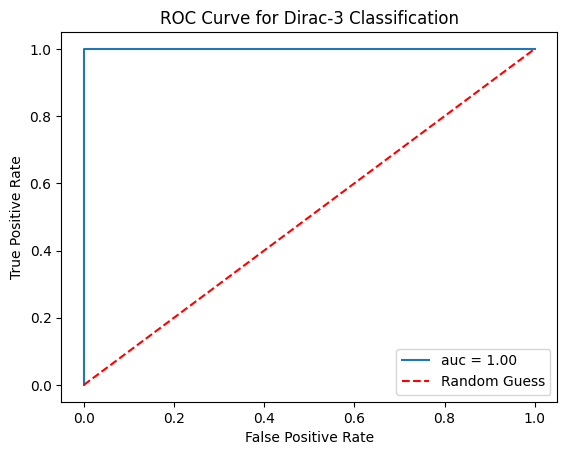

In [5]:
print(Counter(y_train_prd))
print(Counter(y_test_prd))

print(
    "Train precision:",
    precision_score(y_train, y_train_prd, labels=[-1, 1], pos_label=1),
)
print(
    "Train recall:",
    recall_score(y_train, y_train_prd, labels=[-1, 1], pos_label=1),
)
print(
    "Train accuracy:",
    accuracy_score(y_train, y_train_prd),
)
print(
    "Train confusion matrix:",
)
print(
    confusion_matrix(y_train, y_train_prd, labels=[-1, 1]),
)

print(
    "Test precision:",
    precision_score(y_test, y_test_prd, labels=[-1, 1], pos_label=1),
)
print(
    "Test recall:",
    recall_score(y_test, y_test_prd, labels=[-1, 1], pos_label=1),
)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_test_prd)
area = auc(false_positive_rate, true_positive_rate)
plt.plot(false_positive_rate, true_positive_rate, label=f'auc = {area:.2f}')
plt.plot([0, 1], [0, 1], 'r--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Dirac-3 Classification')
plt.legend()